## References

1. [How to Create Any Image Using Only Sine Functions | 2D Fourier Transform in Python](https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/)
2. numpy: https://numpy.org/doc/stable/reference/routines.fft.html

# Visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

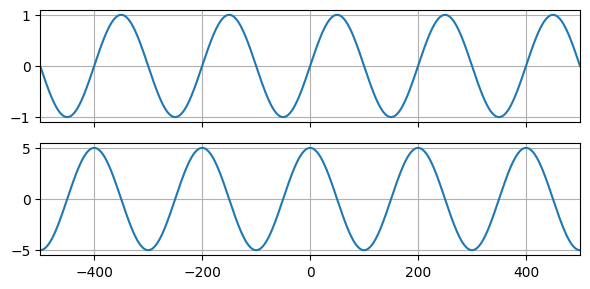

the shape of x: (1001,)


In [2]:
def _plot_sinusoids():
    #plt.figure(figsize=(6, 2))
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 3), sharex=True)
    
    x = np.arange(-500, 501, 1)
    amplitude = 1.0
    wavelength = 200.0
    offset = 0
    y = amplitude * np.sin((2 * np.pi * x / wavelength) + offset)
    
    ax1.plot(x, y)
    ax1.grid()
    #ax1.xlim(np.min(x), np.max(x))
    
    x = np.arange(-500, 501, 1)
    amplitude = 5.0
    wavelength = 200.0
    offset = np.pi / 2
    y = amplitude * np.sin((2 * np.pi * x / wavelength) + offset)
    
    ax2.plot(x, y)
    ax2.grid()
    
    ax2.set_xlim(np.min(x), np.max(x))
    
    plt.tight_layout()
    plt.show()

    print(f'the shape of x: {x.shape}')

_plot_sinusoids()

Shape of first grating: (1001, 1001)


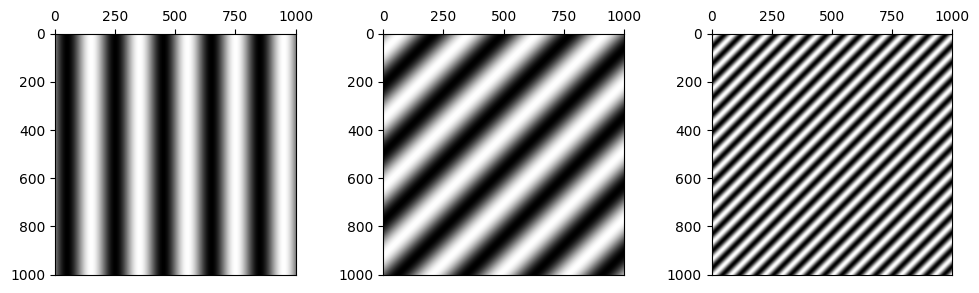

In [3]:
def _plot_gratings():
    
    plt.figure(figsize=(10, 3))
    
    #############
    # GRATING 1 #
    #############
    _x = np.arange(-500, 501, 1)
    X, Y = np.meshgrid(_x, _x)
    grating = 1.0 * np.sin((2 * np.pi * X / 200) + (0*np.pi))
    print(f'Shape of first grating: {X.shape}')
    
    plt.subplot(131)
    plt.imshow(grating, cmap='gray')
    plt.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False)
    
    #############
    # GRATING 2 #
    #############
    width = 1001
    height = 1001
    wavelength = 200
    angle = np.deg2rad(45)
    
    X, Y = np.meshgrid(np.arange(width), np.arange(height))
    grating = np.sin(
        2 * np.pi * (X * np.cos(angle) + Y * np.sin(angle)) / wavelength
    )
    
    plt.subplot(132)
    plt.imshow(grating, cmap='gray')
    plt.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False)
    
    
    #############
    # GRATING 3 #
    #############
    width = 1001
    height = 1001
    wavelength = 50
    angle = np.deg2rad(45)
    
    X, Y = np.meshgrid(np.arange(width), np.arange(height))
    grating = np.sin(
        2 * np.pi * (X * np.cos(angle) + Y * np.sin(angle)) / wavelength
    )
    
    plt.subplot(133)
    plt.imshow(grating, cmap='gray')
    plt.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False)
    
    
    plt.tight_layout()
    plt.show()

_plot_gratings()

# 1D FT

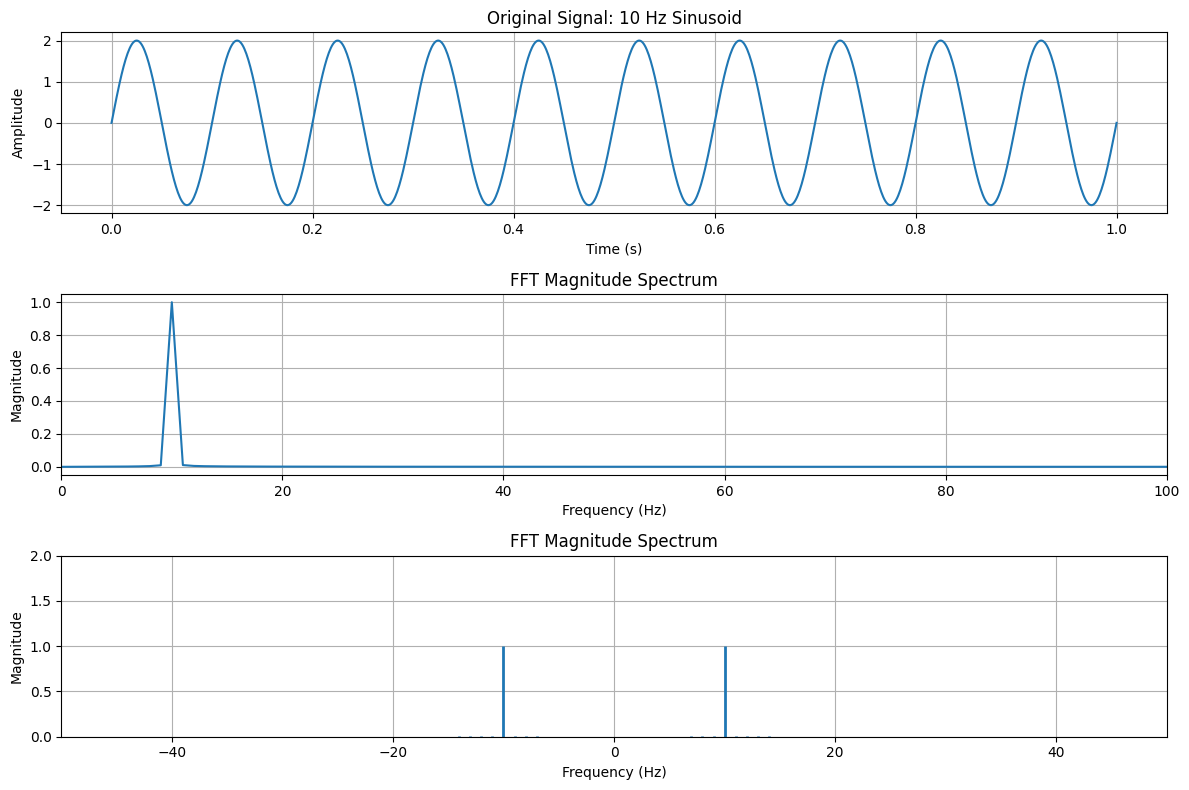

In [4]:
def _1d_signal_fft():
    """
    The code generates a 10 Hz sinusoid and computes its FFT.
    
    We create a 1-second signal sampled at 1000 Hz (sample_rate).
    The signal is a pure sine wave at 10 Hz.
    """
    # Signal parameters.
    duration = 1.0  # Duration of signal in seconds.
    sample_rate = 1000  # Number of samples per second.
    freq = 10  # Frequency of our sinusoid in Hz.
    
    # Generate time array.
    t = np.linspace(0, duration, int(sample_rate * duration))
    
    # Create a `freq` Hz sine wave.
    signal = 2 * np.sin(2 * np.pi * freq * t)
    
    # Compute the FFT.
    # fft returns complex numbers, so we take the absolute value to get magnitudes.
    fft_result = np.fft.fft(signal)
    fft_magnitude = np.abs(fft_result)

    # Get the corresponding frequencies for plotting
    # fftfreq returns the frequencies corresponding to the FFT bins
    frequencies = np.fft.fftfreq(len(t), 1/sample_rate)
    
    # Create a figure with two subplots
    plt.figure(figsize=(12, 8))
    
    # Plot the original signal
    plt.subplot(3, 1, 1)
    plt.plot(t, signal)
    plt.title(f'Original Signal: {freq} Hz Sinusoid')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    
    # Plot the FFT magnitude spectrum
    # We'll only show the positive frequencies up to sample_rate/2 (Nyquist frequency)
    plt.subplot(3, 1, 2)
    # Only plot the positive frequencies (up to len(frequencies)//2)
    positive_freq_mask = frequencies >= 0
    plt.plot(frequencies[positive_freq_mask], fft_magnitude[positive_freq_mask]/t.size)
    plt.title('FFT Magnitude Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.xlim(0, 100)  # Limit x-axis to better see the peak


    # Plot the FFT magnitude spectrum using stem
    plt.subplot(3, 1, 3)
    plt.vlines(
        frequencies, 
        ymin=0, 
        ymax=fft_magnitude/t.size,
        linewidth=2,
    )
    
    plt.title('FFT Magnitude Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.xlim(-50, 50)
    plt.ylim(0, 2)
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()

_1d_signal_fft()

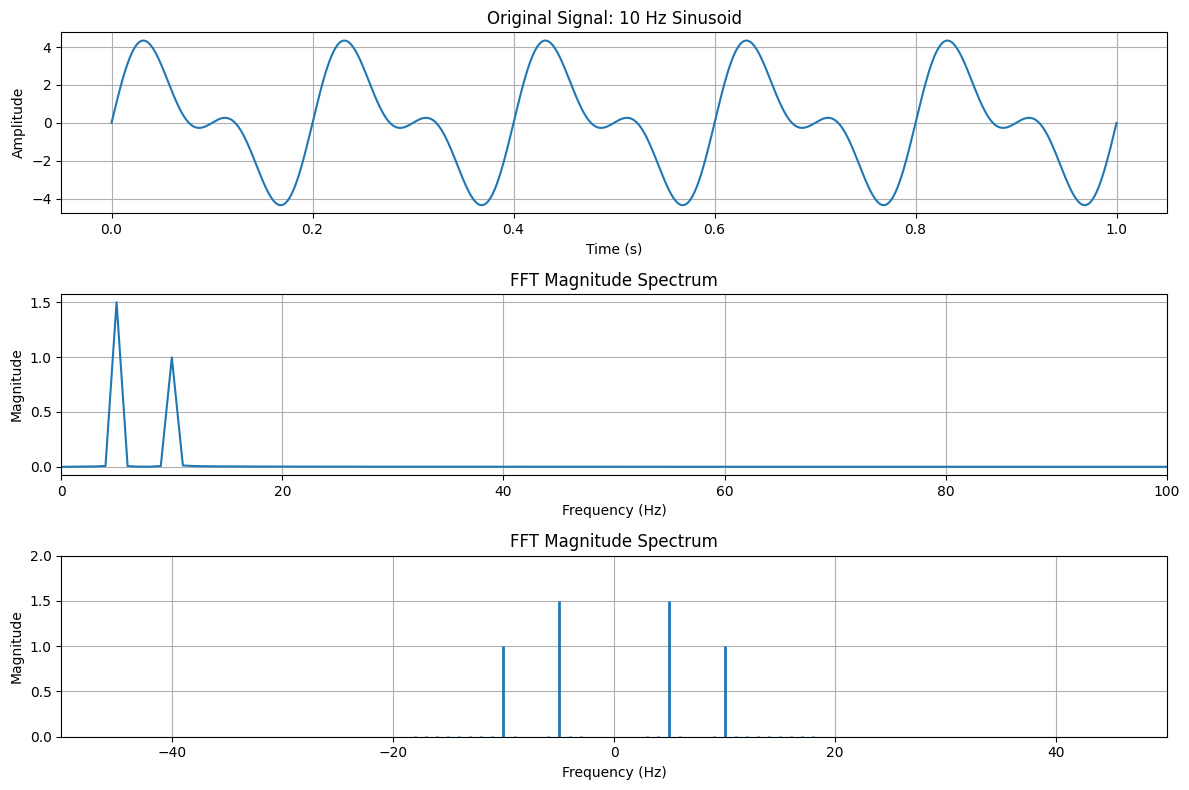

In [5]:
def _1d_signal_many_sinusoids():
    """
    The code generates a 10 Hz sinusoid and computes its FFT.
    
    We create a 1-second signal sampled at 1000 Hz (sample_rate).
    The signal is a pure sine wave at 10 Hz.
    """
    # Signal parameters.
    duration = 1.0  # Duration of signal in seconds.
    sample_rate = 1000  # Number of samples per second.
    freq = 10  # Frequency of our sinusoid in Hz.
    
    # Generate time array.
    t = np.linspace(0, duration, int(sample_rate * duration))
    
    # Create a `freq` Hz sine wave.
    signal = 2 * np.sin(2 * np.pi * freq * t) + 3 * np.sin(2 * np.pi * 5 * t)
    
    # Compute the FFT.
    # fft returns complex numbers, so we take the absolute value to get magnitudes.
    fft_result = np.fft.fft(signal)
    fft_magnitude = np.abs(fft_result)

    # Get the corresponding frequencies for plotting
    # fftfreq returns the frequencies corresponding to the FFT bins
    frequencies = np.fft.fftfreq(len(t), 1/sample_rate)
    
    # Create a figure with two subplots
    plt.figure(figsize=(12, 8))
    
    # Plot the original signal
    plt.subplot(3, 1, 1)
    plt.plot(t, signal)
    plt.title(f'Original Signal: {freq} Hz Sinusoid')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    
    # Plot the FFT magnitude spectrum
    # We'll only show the positive frequencies up to sample_rate/2 (Nyquist frequency)
    plt.subplot(3, 1, 2)
    # Only plot the positive frequencies (up to len(frequencies)//2)
    positive_freq_mask = frequencies >= 0
    plt.plot(frequencies[positive_freq_mask], fft_magnitude[positive_freq_mask]/t.size)
    plt.title('FFT Magnitude Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.xlim(0, 100)  # Limit x-axis to better see the peak


    plt.subplot(3, 1, 3)
    plt.vlines(
        frequencies, 
        ymin=0, 
        ymax=fft_magnitude/t.size,
        linewidth=2,
    )
    
    plt.title('FFT Magnitude Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.xlim(-50, 50)
    plt.ylim(0, 2)
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()

    return fft_magnitude, t

fft_magnitude, t = _1d_signal_many_sinusoids()

In [6]:
# To find the amplitude of the sinusoids that make up the signal,
# make a mask where you identify the abs values normalized
# look for non-zero values.
# The normalized magnitudes will correspond to half the amplitude for each sinusoid.
norm_fft_magnitudes = fft_magnitude / t.size
_mask = norm_fft_magnitudes > 0.1
norm_fft_magnitudes[_mask]

array([1.50051845, 0.99733118, 0.99733118, 1.50051845])

In [7]:
# To find the indices corresponding to the frequencies that make up the sinusoids, 
# first find in the normalized magnitudes the non-zero values - like above.
# but this time we are not interested in the values at those places but on their indices.
np.where(norm_fft_magnitudes > 0.1)[0]  # [0] because np.where returns a tuple

array([  5,  10, 990, 995])

In [8]:
# Next, get the Discrete Fourier Transform sample frequencies.
# These frequencies MUST match our smapling rate in order to get the correct frequencies
# using the indices from the normalized magnitudes.
"""
When you use 1/sample_rate (1/1000).
The frequencies match your actual signal frequencies:

1. The frequencies are scaled correctly to Hz
1. For a 1000-point FFT with 1/1000 second spacing, you get:

0 to 499 Hz (positive frequencies)
-500 to -1 Hz (negative frequencies)

This makes sense because your Nyquist frequency (max frequency you can detect) is sample_rate/2 = 500 Hz.

When you use 1 as the sample spacing, you're essentially saying each sample is 1 second apart.
So your frequencies become:

0 to 0.499 Hz (positive)
-0.5 to -0.001 Hz (negative)
"""
_frequencies = np.fft.fftfreq(len(t), 1/1000)
_frequencies.shape #, _frequencies

(1000,)

In [9]:
# Now, feed the indices into the frequencies list to obtain the frequencies of our signal.
_frequencies[5], _frequencies[10], _frequencies[ np.where(norm_fft_magnitudes > 0.1)[0] ] 

(np.float64(5.0), np.float64(10.0), array([  5.,  10., -10.,  -5.]))

# 2D FFT

In [10]:
# We will use the shift functions to place the zero of our frequency ranges in the center of the image.
# This is convention for visualization.
_input = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
])

_input, np.fft.ifftshift(_input), np.fft.fftshift(_input)

(array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]),
 array([[5, 6, 4],
        [8, 9, 7],
        [2, 3, 1]]),
 array([[9, 7, 8],
        [3, 1, 2],
        [6, 4, 5]]))

In [11]:
_X, _Y = np.meshgrid(np.arange(3), np.arange(3))

_X, _Y, np.fft.ifftshift(_X), np.fft.fftshift(_X)

(array([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]),
 array([[0, 0, 0],
        [1, 1, 1],
        [2, 2, 2]]),
 array([[1, 2, 0],
        [1, 2, 0],
        [1, 2, 0]]),
 array([[2, 0, 1],
        [2, 0, 1],
        [2, 0, 1]]))

In [12]:
_X, _ = np.meshgrid(np.arange(-3, 4, 1), np.arange(-3, 4, 1))

_X, np.fft.ifftshift(_X), np.fft.fftshift(_X)

(array([[-3, -2, -1,  0,  1,  2,  3],
        [-3, -2, -1,  0,  1,  2,  3],
        [-3, -2, -1,  0,  1,  2,  3],
        [-3, -2, -1,  0,  1,  2,  3],
        [-3, -2, -1,  0,  1,  2,  3],
        [-3, -2, -1,  0,  1,  2,  3],
        [-3, -2, -1,  0,  1,  2,  3]]),
 array([[ 0,  1,  2,  3, -3, -2, -1],
        [ 0,  1,  2,  3, -3, -2, -1],
        [ 0,  1,  2,  3, -3, -2, -1],
        [ 0,  1,  2,  3, -3, -2, -1],
        [ 0,  1,  2,  3, -3, -2, -1],
        [ 0,  1,  2,  3, -3, -2, -1],
        [ 0,  1,  2,  3, -3, -2, -1]]),
 array([[ 1,  2,  3, -3, -2, -1,  0],
        [ 1,  2,  3, -3, -2, -1,  0],
        [ 1,  2,  3, -3, -2, -1,  0],
        [ 1,  2,  3, -3, -2, -1,  0],
        [ 1,  2,  3, -3, -2, -1,  0],
        [ 1,  2,  3, -3, -2, -1,  0],
        [ 1,  2,  3, -3, -2, -1,  0]]))

In [13]:
_X, _ = np.meshgrid(np.arange(0, 4, 1), np.arange(0, 4, 1))

_X, np.fft.ifftshift(_X), np.fft.fftshift(_X)

(array([[0, 1, 2, 3],
        [0, 1, 2, 3],
        [0, 1, 2, 3],
        [0, 1, 2, 3]]),
 array([[2, 3, 0, 1],
        [2, 3, 0, 1],
        [2, 3, 0, 1],
        [2, 3, 0, 1]]),
 array([[2, 3, 0, 1],
        [2, 3, 0, 1],
        [2, 3, 0, 1],
        [2, 3, 0, 1]]))

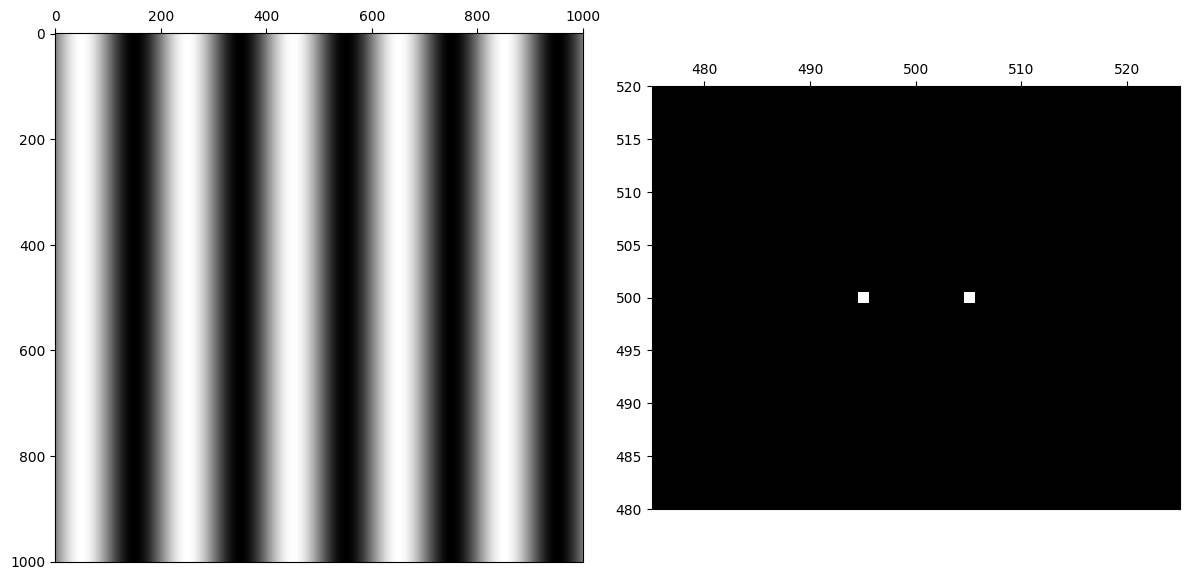

In [14]:
width = 1001
height = 1001
wavelength = 200
angle = np.deg2rad(0)

X, Y = np.meshgrid(np.arange(width), np.arange(height))
grating = np.sin(
    (2 * np.pi * (X * np.cos(angle) + Y * np.sin(angle)) / wavelength)
    + 0
)

# Since the mesh ranges from 0 to width, we only need one shift to have the zero at the center.
ft = np.fft.fft2(grating)
ft = np.fft.fftshift(ft)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 13))

ax1.imshow(grating, cmap='gray')
ax1.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False)

ax2.imshow(np.abs(ft), cmap='gray')
ax2.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False)
ax2.set_xlim([475, 525])
ax2.set_ylim([480, 520])
#ax2.set_xlim([-10, 8])
#ax2.set_ylim([-10, 8])

plt.tight_layout()
plt.show()

In [15]:
np.unravel_index(np.argmax(abs(ft)), ft.shape)

(np.int64(500), np.int64(495))

In [16]:
abs(ft[500, 495])

np.float64(500729.49154169904)

In [17]:
abs(ft[500, 505])

np.float64(500729.49154169904)

In [18]:
X.shape

(1001, 1001)

In [19]:
# This scaling happens because the FFT preserves the total energy in the signal, distributed across all frequencies.
abs(ft[500, 495]) / (width * height)  # Should be close to 0.5

np.float64(0.4997295327466729)

In [20]:
"""
With a wavelength of 200 pixels, your pattern repeats every 200 pixels.

In the frequency domain, we're measuring how many complete cycles fit within our image width.
"""
peak_distance = width / wavelength  # ≈ 5 pixels from center
center = width // 2  # 500

peak_distance, center

(5.005, 500)

shape of mesh: (1001, 1001), (1001, 1001)


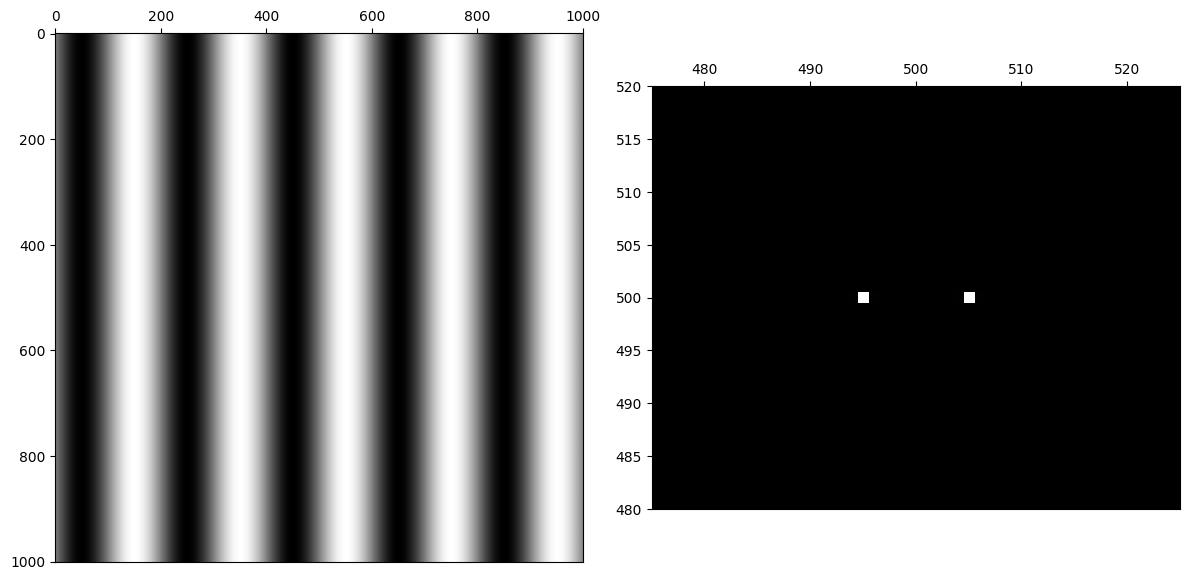

In [21]:
#width = 1001
#height = 1001
wavelength = 200
angle = np.deg2rad(0)

_x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(_x, _x)
grating = 5.0 * np.sin(
    (2 * np.pi * (X * np.cos(angle) + Y * np.sin(angle)) / wavelength)
    + (0*np.pi)
)
print(f'shape of mesh: {X.shape}, {Y.shape}')

# Since the mesh ranges from - somenumber to + somenumber,
# we need to do a quadrant shift that will put the zeros on the top-left side (ifftshift) first.
# Then, we do the normal shift after the fft.
ft = np.fft.ifftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 13))

ax1.imshow(grating, cmap='gray')
ax1.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False)

ax2.imshow(np.abs(ft), cmap='gray')
ax2.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False)
ax2.set_xlim([475, 525])
ax2.set_ylim([480, 520])
#ax2.set_xlim([-10, 8])
#ax2.set_ylim([-10, 8])

plt.tight_layout()
plt.show()

By default, the FFT algorithm (specifically numpy's fft2) assumes:
- The origin (zero frequency) is at the top-left corner
- Positive frequencies increase going right/down until halfway
- Then negative frequencies continue from halfway to the end

But when visualizing frequency data, we usually want:
- The zero frequency (DC component) in the center
- Low frequencies near the center
- High frequencies (both positive and negative) at the edges

```python
X, Y = np.meshgrid(np.arange(width), np.arange(height))
```

Here your input data already has its "zero" at the top-left corner, matching FFT's natural organization.
So you only need fftshift after the FFT to center the output for visualization.

```python
_x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(_x, _x)
```

Here your input data has its "zero" in the center. You need to:

1. First use ifftshift to move the zero to the top-left (where FFT expects it)
1. Do the FFT
1. Then use fftshift to center the output for visualization

The reason this isn't just convention is that the FFT algorithm is actually computing a discrete sum of complex exponentials, and it needs to know where "zero" is to properly compute the phase relationships. The shifts ensure these phase relationships are calculated correctly!

In [22]:
_x.shape, X.shape, Y.shape

((1001,), (1001, 1001), (1001, 1001))

In [23]:
# Get frequency arrays for both dimensions
freq_x = np.fft.fftfreq(_x.size, 1)
freq_y = np.fft.fftfreq(_x.size, 1)

# Since we fftshifted our FFT data, shift frequencies too
freq_x = np.fft.fftshift(freq_x)
freq_y = np.fft.fftshift(freq_y)

In [24]:
norm_fft_magnitudes = np.abs(ft) / np.square(_x.size)

_threshold = 0.1
peak_mask = norm_fft_magnitudes > _threshold
peak_indices = np.where(peak_mask)

In [25]:
# Amplitudes:
norm_fft_magnitudes[peak_indices]

array([2.49864766, 2.49864766])

In [26]:
peak_indices, peak_indices[0]

((array([500, 500]), array([495, 505])), array([500, 500]))

In [27]:
# Frequency is 1/\lambda.
1/wavelength

0.005

In [28]:
freq_x[peak_indices[1]], freq_y[peak_indices[0]]

(array([-0.004995,  0.004995]), array([0., 0.]))

shape of mesh: (1001, 1001), (1001, 1001)


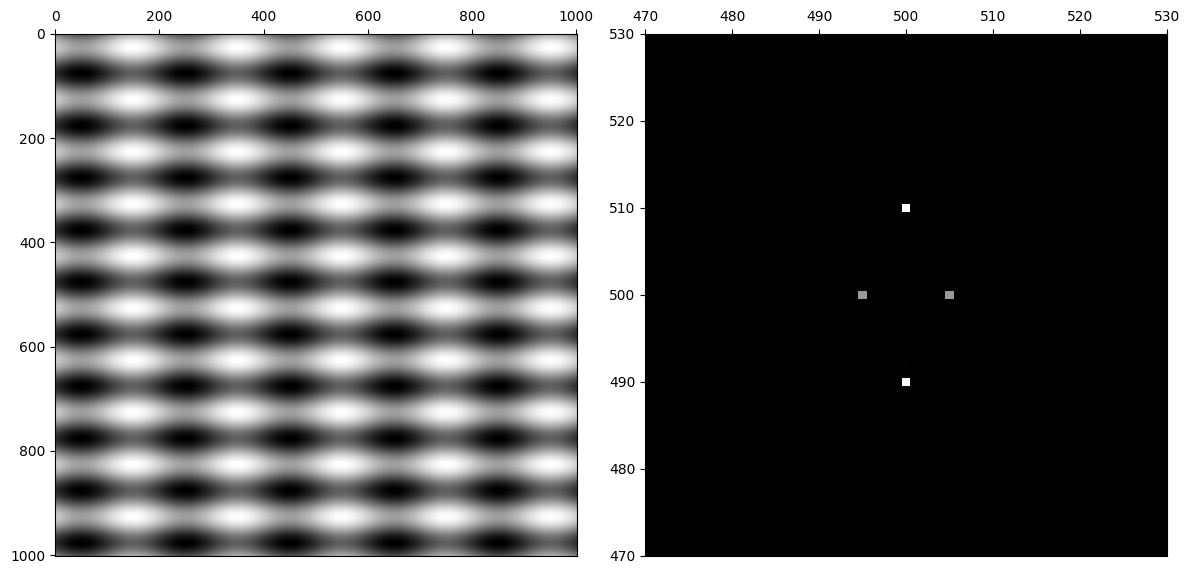

In [29]:
#width = 1001
#height = 1001
wavelength = 200
angle = np.deg2rad(0)

_x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(_x, _x)
grating = 30 * np.sin(
    (2 * np.pi * (X * np.cos(angle) + Y * np.sin(angle)) / wavelength)
    + (0*np.pi)
) + 50 * np.sin(
    (2 * np.pi * (X * np.cos(np.deg2rad(90)) + Y * np.sin(np.deg2rad(90))) / 100)
    + (0*np.pi)
)
print(f'shape of mesh: {X.shape}, {Y.shape}')

# Since the mesh ranges from - somenumber to + somenumber,
# we need to do a quadrant shift that will put the zeros on the top-left side (ifftshift) first.
# Then, we do the normal shift after the fft.
ft = np.fft.ifftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 13))

ax1.imshow(grating, cmap='gray')
ax1.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False)

ax2.imshow(np.abs(ft), cmap='gray')
ax2.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False)
ax2.set_xlim([470, 530])
ax2.set_ylim([470, 530])
#ax2.set_xlim([-10, 8])
#ax2.set_ylim([-10, 8])

plt.tight_layout()
plt.show()

In [30]:
norm_fft_magnitudes = np.abs(ft) / np.square(_x.size)

_threshold = 1
peak_mask = norm_fft_magnitudes > _threshold
peak_indices = np.where(peak_mask)
peak_indices

(array([490, 500, 500, 510]), array([500, 495, 505, 500]))

In [31]:
# Amplitudes:
norm_fft_magnitudes[peak_indices]

array([24.98338796, 14.99188598, 14.99188598, 24.98338796])

In [32]:
# Get frequency arrays for both dimensions
freq_x = np.fft.fftfreq(_x.size, 1)
freq_y = np.fft.fftfreq(_x.size, 1)

# Since we fftshifted our FFT data, shift frequencies too
freq_x = np.fft.fftshift(freq_x)
freq_y = np.fft.fftshift(freq_y)

In [33]:
freq_x[peak_indices[1]], freq_y[peak_indices[0]]

(array([ 0.      , -0.004995,  0.004995,  0.      ]),
 array([-0.00999001,  0.        ,  0.        ,  0.00999001]))

In [34]:
1/200, 1/100

(0.005, 0.01)